# Coursera: Applied Plotting, Charting and Data Representation in Python
University of Michigan  
Plotting Assigment 4

Author: Jane Hung  
Date: July 22, 2019

 Requirements: 
 * State the region and the domain category that your data sets are about (e.g., **Raleigh, North Carolina, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.


Response:
* The data sets chosen are about average cost of attendance for universities in North Carolina, United States and New York, United States.
* Question: What is the difference between cost of attendance at universities in North Carolina and in New York?
* Datasets extracted using API calls to [college scorecard data](https://collegescorecard.ed.gov/data/documentation/). [Link](https://collegescorecard.ed.gov/search/?state=NC&sort=salary:desc&page=1) to how this data was used visually in the college scorecard.

## Initialize environment

In [104]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
% matplotlib inline

# statistics packages
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## NC schools API call
Use the requests package to query data through an API call. Use this [resource](https://github.com/RTICWDT/open-data-maker/blob/master/API.md) for help building the query.  

Originally, this data built up the report for the Department of Education's [College Scorecard](https://collegescorecard.ed.gov/).

Queried data with these requirements:  
* **North Carolina:**
    - State FIPS = 37
    - School name
    - School city
    - Latest average net price, public
    - Latest average net price, private
* **New York:**
    - State FIPS = 36
    - School name
    - School city
    - Latest average net price, public
    - Latest average net price, private

In [17]:
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.state_fips=37&_fields=school.name,school.city,latest.cost.avg_net_price.public,latest.cost.avg_net_price.private&api_key=PYiV7sp48Hy8l2XDg3bgx4tEEOLW8oaPthCNtgjR'
response = requests.get(url)
response.status_code

200

In [18]:
total_results=[]
total_results = total_results + json.loads(response.text)['results']
total_results

[{'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': 7861,
  'school.city': 'Spindale',
  'school.name': 'Isothermal Community College'},
 {'latest.cost.avg_net_price.private': 23018,
  'latest.cost.avg_net_price.public': None,
  'school.city': 'Greensboro',
  'school.name': 'Bennett College'},
 {'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': 9068,
  'school.city': 'Morehead City',
  'school.name': 'Carteret Community College'},
 {'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': 5662,
  'school.city': 'Polkton',
  'school.name': 'South Piedmont Community College'},
 {'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': 13691,
  'school.city': 'Boone',
  'school.name': 'Appalachian State University'},
 {'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': 6101,
  'school.city': 'Charlotte',
  'school.name': 'Central Piedmont Community Co

In [19]:
while (response.json()['metadata']['page']+ 1 ) * response.json()['metadata']['per_page'] < response.json()['metadata']['total']:
    print("\nNext page found, downloading page", response.json()['metadata']['page']+ 1)
    next_page_url = url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.state_fips=37&_fields=school.name,school.city,latest.cost.avg_net_price.public,latest.cost.avg_net_price.private&_page={}&api_key=PYiV7sp48Hy8l2XDg3bgx4tEEOLW8oaPthCNtgjR' \
        .format(response.json()['metadata']['page']+ 1)
    response = requests.get(next_page_url)
    # Store the current page of results
    total_results = total_results + json.loads(response.text)['results']
    print("Number of results processed: {} \nTotal number of results: {}".format(
            len(total_results), response.json()['metadata']['total']))

Next page found, downloading page 1
Number of results processed: 40 
Total number of results: 187
Next page found, downloading page 2
Number of results processed: 60 
Total number of results: 187
Next page found, downloading page 3
Number of results processed: 80 
Total number of results: 187
Next page found, downloading page 4
Number of results processed: 100 
Total number of results: 187
Next page found, downloading page 5
Number of results processed: 120 
Total number of results: 187
Next page found, downloading page 6
Number of results processed: 140 
Total number of results: 187
Next page found, downloading page 7
Number of results processed: 160 
Total number of results: 187
Next page found, downloading page 8
Number of results processed: 180 
Total number of results: 187
Next page found, downloading page 9
Number of results processed: 187 
Total number of results: 187


In [20]:
nc_school = pd.DataFrame(total_results)
nc_school.head()
nc_school.shape

,latest.cost.avg_net_price.private,latest.cost.avg_net_price.public,school.city,school.name
0,NaN,7861.0,Spindale,Isothermal Community College
1,23018.0,NaN,Greensboro,Bennett College
2,NaN,9068.0,Morehead City,Carteret Community College
3,NaN,5662.0,Polkton,South Piedmont Community College
4,NaN,13691.0,Boone,Appalachian State University


(187, 4)

## NY schools API call

In [21]:
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.state_fips=36&_fields=school.name,school.city,latest.cost.avg_net_price.public,latest.cost.avg_net_price.private&api_key=PYiV7sp48Hy8l2XDg3bgx4tEEOLW8oaPthCNtgjR'
response = requests.get(url)
response.status_code

200

In [22]:
total_results=[]
total_results = total_results + json.loads(response.text)['results']
total_results

[{'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': None,
  'school.city': 'Astoria',
  'school.name': 'Miami Ad School-New York'},
 {'latest.cost.avg_net_price.private': 10404,
  'latest.cost.avg_net_price.public': None,
  'school.city': 'Latham',
  'school.name': 'Aesthetic Science Institute'},
 {'latest.cost.avg_net_price.private': 25602,
  'latest.cost.avg_net_price.public': None,
  'school.city': 'New York',
  'school.name': 'Digital Film Academy'},
 {'latest.cost.avg_net_price.private': 11886,
  'latest.cost.avg_net_price.public': None,
  'school.city': 'Copiague',
  'school.name': 'Electrical Training Center'},
 {'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': None,
  'school.city': 'Hempstead',
  'school.name': 'Access Careers'},
 {'latest.cost.avg_net_price.private': None,
  'latest.cost.avg_net_price.public': None,
  'school.city': 'Monsey',
  'school.name': "Mechon L'hoyroa"},
 {'latest.cost.avg_net_price.privat

In [23]:
while (response.json()['metadata']['page']+ 1 ) * response.json()['metadata']['per_page'] < response.json()['metadata']['total']:
    print("\nNext page found, downloading page", response.json()['metadata']['page']+ 1)
    next_page_url = url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.state_fips=36&_fields=school.name,school.city,latest.cost.avg_net_price.public,latest.cost.avg_net_price.private&_page={}&api_key=PYiV7sp48Hy8l2XDg3bgx4tEEOLW8oaPthCNtgjR' \
        .format(response.json()['metadata']['page']+ 1)
    response = requests.get(next_page_url)
    # Store the current page of results
    total_results = total_results + json.loads(response.text)['results']
    print("Number of results processed: {} \nTotal number of results: {}".format(
            len(total_results), response.json()['metadata']['total']))

Next page found, downloading page 1
Number of results processed: 40 
Total number of results: 449
Next page found, downloading page 2
Number of results processed: 60 
Total number of results: 449
Next page found, downloading page 3
Number of results processed: 80 
Total number of results: 449
Next page found, downloading page 4
Number of results processed: 100 
Total number of results: 449
Next page found, downloading page 5
Number of results processed: 120 
Total number of results: 449
Next page found, downloading page 6
Number of results processed: 140 
Total number of results: 449
Next page found, downloading page 7
Number of results processed: 160 
Total number of results: 449
Next page found, downloading page 8
Number of results processed: 180 
Total number of results: 449
Next page found, downloading page 9
Number of results processed: 200 
Total number of results: 449
Next page found, downloading page 10
Number of results processed: 220 
Total number of results: 449
Next page fo

In [24]:
ny_school = pd.DataFrame(total_results)
ny_school.head()
ny_school.shape

,latest.cost.avg_net_price.private,latest.cost.avg_net_price.public,school.city,school.name
0,NaN,NaN,Astoria,Miami Ad School-New York
1,10404.0,NaN,Latham,Aesthetic Science Institute
2,25602.0,NaN,New York,Digital Film Academy
3,11886.0,NaN,Copiague,Electrical Training Center
4,NaN,NaN,Hempstead,Access Careers


(449, 4)

## Combine public and private costs into one column

In [27]:
nc_school['latest.cost.avg_net_price'] = nc_school['latest.cost.avg_net_price.private'].combine_first(nc_school['latest.cost.avg_net_price.public'])
ny_school['latest.cost.avg_net_price'] = ny_school['latest.cost.avg_net_price.private'].combine_first(ny_school['latest.cost.avg_net_price.public'])

nc_school.head()
ny_school.head()

,latest.cost.avg_net_price.private,latest.cost.avg_net_price.public,school.city,school.name,latest.cost.avg_net_price
0,NaN,7861.0,Spindale,Isothermal Community College,7861.0
1,23018.0,NaN,Greensboro,Bennett College,23018.0
2,NaN,9068.0,Morehead City,Carteret Community College,9068.0
3,NaN,5662.0,Polkton,South Piedmont Community College,5662.0
4,NaN,13691.0,Boone,Appalachian State University,13691.0


,latest.cost.avg_net_price.private,latest.cost.avg_net_price.public,school.city,school.name,latest.cost.avg_net_price
0,NaN,NaN,Astoria,Miami Ad School-New York,NaN
1,10404.0,NaN,Latham,Aesthetic Science Institute,10404.0
2,25602.0,NaN,New York,Digital Film Academy,25602.0
3,11886.0,NaN,Copiague,Electrical Training Center,11886.0
4,NaN,NaN,Hempstead,Access Careers,NaN


In [36]:
nc_school.dropna(subset=['latest.cost.avg_net_price'], inplace=True)
ny_school.dropna(subset=['latest.cost.avg_net_price'], inplace=True)

In [42]:
nc_school.shape
nc_school.isnull().sum()
ny_school.shape
ny_school.isnull().sum()

(167, 5)

latest.cost.avg_net_price.private    75
latest.cost.avg_net_price.public     92
school.city                           0
school.name                           0
latest.cost.avg_net_price             0
dtype: int64

(375, 5)

latest.cost.avg_net_price.private    103
latest.cost.avg_net_price.public     272
school.city                            0
school.name                            0
latest.cost.avg_net_price              0
dtype: int64

## Visualize and compare data

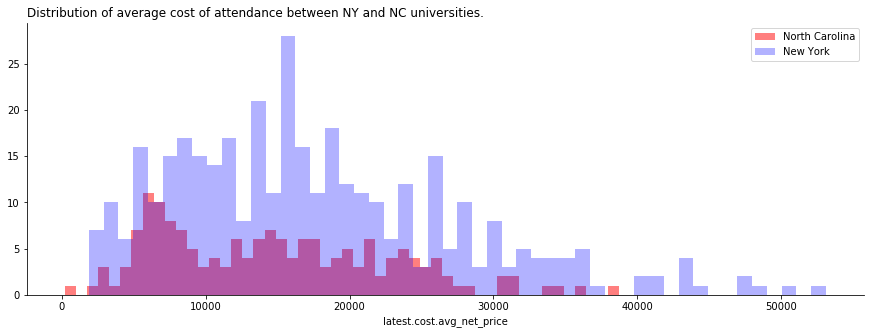

In [102]:
fig1 = plt.figure(figsize=(15,5));
sns.distplot(nc_school['latest.cost.avg_net_price'], kde=False, bins=50, 
             hist_kws={'alpha':0.5, 'color':'red'}, label = 'North Carolina');
sns.distplot(ny_school['latest.cost.avg_net_price'], kde=False, bins=50, 
             hist_kws={'alpha':0.3,'color':'blue'}, label = 'New York');
fig1.get_axes()[0].spines['right'].set_visible(False);
fig1.get_axes()[0].spines['top'].set_visible(False);
plt.legend(loc='upper right');
plt.title('Distribution of average cost of attendance between NY and NC universities.',loc='left');


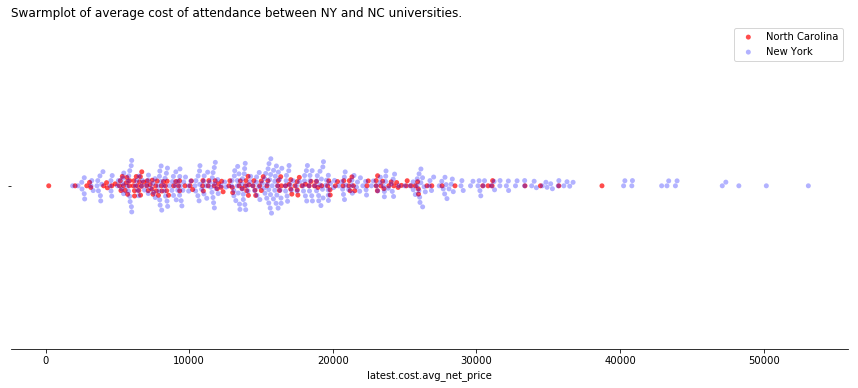

In [103]:
fig1 = plt.figure(figsize=(15,6));
sns.swarmplot(nc_school['latest.cost.avg_net_price'], alpha = 0.7, color = 'red', label='North Carolina');
sns.swarmplot(ny_school['latest.cost.avg_net_price'], alpha = 0.3, color = 'blue', label='New York');
fig1.get_axes()[0].spines['right'].set_visible(False);
fig1.get_axes()[0].spines['top'].set_visible(False);
fig1.get_axes()[0].spines['left'].set_visible(False);
plt.legend(loc='upper right');
plt.title('Swarmplot of average cost of attendance between NY and NC universities.',loc='left');

In [73]:
nc_school['latest.cost.avg_net_price'].describe()
ny_school['latest.cost.avg_net_price'].describe()

count      167.000000
mean     14786.628743
std       7965.750974
min        224.000000
25%       7696.000000
50%      14101.000000
75%      20521.500000
max      38741.000000
Name: latest.cost.avg_net_price, dtype: float64

count      375.000000
mean     17595.685333
std       9934.096258
min       1886.000000
25%       9855.000000
50%      15962.000000
75%      23590.000000
max      53109.000000
Name: latest.cost.avg_net_price, dtype: float64

## Hypothesis testing
Prior to using parametric methods, we will need to test for normality. [Source](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)


QQ plot for NC school costs


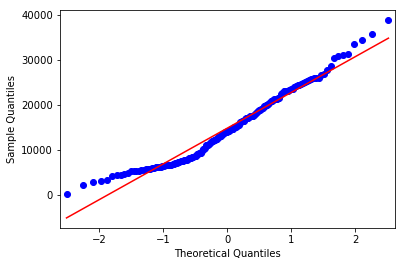

In [89]:
print('\nQQ plot for NC school costs')
qqplot(nc_school['latest.cost.avg_net_price'], line='s');


QQ plot for NY school costs


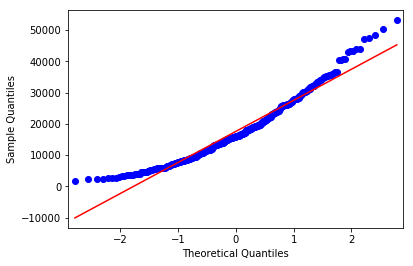

In [90]:
print('\nQQ plot for NY school costs')
qqplot(ny_school['latest.cost.avg_net_price'], line='s');

According to graphical methods (e.g. QQ plots), the data closely fits the expected diagonal pattern for a Gaussian distribution sample. Both datasets graphically show normality.  

Using the Shapiro-Wilk test, we can "quantify how likely it is that the data was drawn from a Gaussian distribution."

In [99]:
stat, p = shapiro(nc_school['latest.cost.avg_net_price'])
print('\nStatistics={0:.4f}, p={1:.4f}'.format(stat,p))


Statistics=0.9608, p=0.0001


In [100]:
stat, p = shapiro(ny_school['latest.cost.avg_net_price'])
print('\nStatistics={0:.4f}, p={1:.4f}'.format(stat,p))


Statistics=0.9497, p=0.0000


Using $\alpha$ = 0.05, we reject the null hypothesis that both sets of data came from a Gaussian distribution since p < $\alpha$. In summary, the NC and NY cost data are not normal, which is an assumption for parametric hypothesis testing. We will then choose a nonparametric alternative.

In [105]:
stat, p = mannwhitneyu(nc_school['latest.cost.avg_net_price'], ny_school['latest.cost.avg_net_price'])
print('\nStatistics={0:.4f}, p={1:.4f}'.format(stat,p))


Statistics=26640.5000, p=0.0028
